In [3]:
import numpy as np 
import matplotlib as plt 


quadratic loss function 


In [4]:
def quadratic_loss(x,y):
    return x**2 + 10*y**2 

gradient loss function 


In [5]:
def quadratic_gradient (x,y):
    dx = 20*x 
    dy = 40*y 
    return np.array([dx,dy])


Batch gradient decent 

In [6]:
def batch_gradient_decent(grad_function ,eta,epochs,start_point):
    x,y = start_point 
    path = [(x,y)]
    losses =[ quadratic_loss(x,y)]
    for _ in range(epochs):
        grad =  grad_function(x,y)
        x -= eta*grad[0]
        y -= eta*grad[1]
        path.append((x,y))
        losses.append(quadratic_loss(x,y))
    return np.array(path),losses

gradient decent with momonetum 

In [7]:
def gradient_decent_momentum(grad_func, eta , beta ,epochs, start_point):
    x , y = start_point 
    v = np.array([0,0])
    path = [(x,y)]
    losses = [quadratic_loss(x,y)]
    for _ in range(epochs):
        grad = grad_func(x,y)
        v = beta*v + (1-beta)*grad 
        x -= eta*v[0]
        y -= eta*v[1]
        path.append((x,y))
        losses.append(quadratic_loss(x,y))
    return np.array(path) , losses 

visualization function for paths 

In [8]:


# ✅ Path Plot
def plot_paths(function, paths, labels, title):
    X, Y = np.meshgrid(
        np.linspace(-2, 2, 400),
        np.linspace(-2, 2, 400)
    )

    Z = function(X, Y)

    plt.figure(figsize=(8, 6))
    plt.contour(X, Y, Z, levels=50)

    for path, label in zip(paths, labels):
        path = np.array(path)

        plt.plot(path[:, 0], path[:, 1], label=label)

        # Start and end markers only once per path
        plt.scatter(path[0, 0], path[0, 1], marker="o")
        plt.scatter(path[-1, 0], path[-1, 1], marker="x")

    plt.title(title)
    plt.xlabel("m")
    plt.ylabel("c")
    plt.legend()
    plt.grid(True)
    plt.show()


visualization of losses

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def plot_losses(losses, labels, title):

    plt.figure(figsize=(8, 6))

    # Plot each optimizer loss curve
    for loss, label in zip(losses, labels):
        plt.plot(loss, linewidth=2, label=label)

    # Labels and styling
    plt.title(title)
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.grid(True)
    plt.legend()
    plt.show()



parameters

In [10]:
eta_bgd =  0.02#learning rate for BGD 
eta_momentum = 0.02
beta = 0.9 #momnetum cofficient 
epochs =  150
start_points = (1.5,1.5) #initail start point of the momentum 


In [11]:
path_bgd , loss_bgd = batch_gradient_decent(quadratic_gradient,eta_bgd,epochs,start_points)
path_momentum, losses_momentum = gradient_decent_momentum(quadratic_gradient, eta_momentum,beta,epochs,start_points)

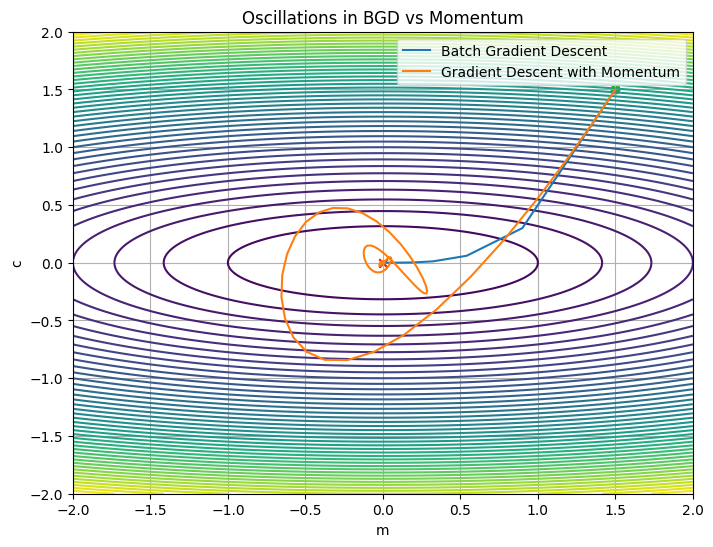

In [12]:
plot_paths(quadratic_loss,[path_bgd,path_momentum],["Batch Gradient Descent", "Gradient Descent with Momentum"],
"Oscillations in BGD vs Momentum")


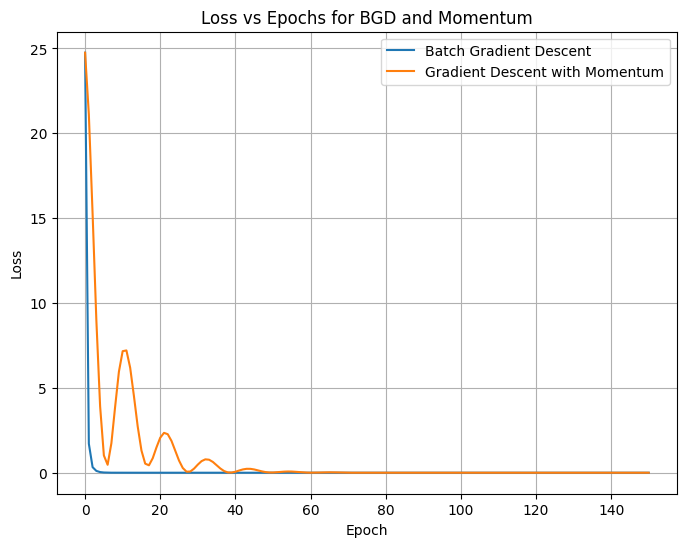

In [13]:
plot_losses([loss_bgd, losses_momentum],
["Batch Gradient Descent", "Gradient Descent with Momentum" ],
"Loss vs Epochs for BGD and Momentum")

In [14]:
losses_momentum  


[24.75,
 np.float64(21.117600000000003),
 np.float64(15.257792160000005),
 np.float64(8.986004836416004),
 np.float64(3.9148471876352287),
 np.float64(1.0183610127734282),
 np.float64(0.46831456482523803),
 np.float64(1.7385847414086297),
 np.float64(3.8951363994799695),
 np.float64(5.950017208234818),
 np.float64(7.162216054376395),
 np.float64(7.206555788157724),
 np.float64(6.186149771899483),
 np.float64(4.515133380454078),
 np.float64(2.7317869483548947),
 np.float64(1.311270373130975),
 np.float64(0.5339406027773915),
 np.float64(0.43784803377623227),
 np.float64(0.8533648339449247),
 np.float64(1.4937437603335957),
 np.float64(2.0637001491623606),
 np.float64(2.3499651765763656),
 np.float64(2.2700333660598484),
 np.float64(1.8723719217289074),
 np.float64(1.2971773736497891),
 np.float64(0.7168663133393379),
 np.float64(0.2779401662337316),
 np.float64(0.06138557571272131),
 np.float64(0.07001036523471567),
 np.float64(0.24149432598874876),
 np.float64(0.4784865192698002),
 np.

In [15]:
path_momentum

array([[ 1.50000000e+00,  1.50000000e+00],
       [ 1.44000000e+00,  1.38000000e+00],
       [ 1.32840000e+00,  1.16160000e+00],
       [ 1.17482400e+00,  8.72112000e-01],
       [ 9.89612640e-01,  5.41803840e-01],
       [ 7.83337910e-01,  2.01182189e-01],
       [ 5.66357137e-01, -1.21471872e-01],
       [ 3.48420156e-01, -4.02142778e-01],
       [ 1.38340067e-01, -6.22575170e-01],
       [-5.62656164e-02, -7.71158310e-01],
       [-2.29160106e-01, -8.43190471e-01],
       [-3.75598743e-01, -8.40564178e-01],
       [-4.92369567e-01, -7.70955380e-01],
       [-5.77768525e-01, -6.46631032e-01],
       [-6.31516847e-01, -4.83008636e-01],
       [-6.54629662e-01, -2.97107788e-01],
       [-6.49246010e-01, -1.06028403e-01],
       [-6.18430882e-01,  7.44253168e-02],
       [-5.65960032e-01,  2.30879639e-01],
       [-4.96097866e-01,  3.53218158e-01],
       [-4.13378001e-01,  4.35065372e-01],
       [-3.22395003e-01,  4.73922635e-01],
       [-2.27614505e-01,  4.70980361e-01],
       [-1.